In [82]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [83]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [84]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [85]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [86]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)



In [87]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns
)


# Copy the crypto names from the original DataFrame
df_market_data_scaled["coin_id"] = df_market_data.index


# Set the coin_id column as index
df_market_data_scaled.set_index("coin_id", inplace=True)


# Display the scaled DataFrame
df_market_data_scaled.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [88]:
# Create a list with the number of k-values from 1 to 11
inertia = []
k = list(range(1, 12))


In [89]:
# Create an empty list to store the inertia values
inertia = []

# Define the range of k values
k_values = list(range(1, 12))

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit the model to the scaled data
    kmeans.fit(df_market_data_scaled)
    
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

    

In [90]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


In [91]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k_values,
    width=800,
    height=400,
    xlabel="Number of clusters",
    ylabel="Inertia",
)




:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  The best value for K is 3

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [92]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=3, random_state=1)



In [93]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_market_data_scaled)



KMeans(n_clusters=3, random_state=1)

In [94]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
crypto_clusters = kmeans.fit_predict(df_market_data_scaled)


# Print the resulting array of cluster values.
print(crypto_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 1
 0 0 0 0]


In [95]:
# Create a copy of the scaled DataFrame
df_market_data_scaled["class"] = kmeans.labels_

In [96]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_scaled["class"] = kmeans.labels_

# Display the copy of the scaled DataFrame
df_market_data_scaled.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [97]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

# Create a scatter plot
scatter_plot = df_market_data_scaled.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="class",  # Use the class column for color coding
    hover_cols=["coin_id"],  # Display the coin ID on hover
    title="Cryptocurrency Clusters",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    size=100,
    colormap="viridis"
)

# Display the scatter plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,class,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [98]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)



In [99]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
crypto_pca = pca.fit_transform(df_market_data_scaled)


# View the scaled PCA data
crypto_pca[:10]


array([[-1.53989072e+00,  1.72074200e-03,  5.99429843e-01],
       [-1.26430978e+00, -2.03956315e-02,  1.15828613e+00],
       [ 3.11943499e-01, -5.56328469e-01, -7.93148023e-01],
       [ 3.08756016e-01, -6.07235705e-01, -6.43243271e-01],
       [-2.97256712e+00,  1.18690730e-01,  1.28739950e+00],
       [-1.98759211e+00,  3.39342476e-01,  6.97284409e-01],
       [-1.64271816e+00,  1.08205911e-01,  2.71120857e+00],
       [-1.52028948e+00,  2.28620603e-01,  1.51314181e+00],
       [-1.26541367e+00, -2.19908319e-01,  8.53885820e-01],
       [ 1.13912017e-01, -8.38169642e-01, -4.53656222e-01]])

In [100]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance



array([0.35447676, 0.32842379, 0.20180846])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is 89% 

In [101]:
# Create a new DataFrame with the PCA data.
df_crypto_pca = pd.DataFrame(
    data=crypto_pca,
    columns=["PC1", "PC2", "PC3"],
    index=df_market_data_scaled.index
)

# Copy the crypto names from the original scaled DataFrame
df_crypto_pca["coin_id"] = df_market_data_scaled.index

# Set the coin_id column as index
df_crypto_pca.set_index("coin_id", inplace=True)

# Display the scaled PCA DataFrame
df_crypto_pca.head(10)


,PC1,PC2,PC3
coin_id,,,
bitcoin,-1.539891,0.001721,0.599430
ethereum,-1.264310,-0.020396,1.158286
tether,0.311943,-0.556328,-0.793148
ripple,0.308756,-0.607236,-0.643243
bitcoin-cash,-2.972567,0.118691,1.287400
binancecoin,-1.987592,0.339342,0.697284
chainlink,-1.642718,0.108206,2.711209
cardano,-1.520289,0.228621,1.513142
litecoin,-1.265414,-0.219908,0.853886


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [102]:
# Create a list with the number of k-values from 1 to 11
inertia_pca = []
k = list(range(1, 12))



In [103]:
# Create an empty list to store the inertia values
inertia_pca = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# Define the range of k values to test
k_values = range(1, 12)

# Loop through each k value
for k in k_values:
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit the model to the PCA-transformed data
    kmeans.fit(df_crypto_pca)
    
    # Append the inertia value to the list
    inertia_pca.append(kmeans.inertia_)



In [104]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values, "inertia": inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)


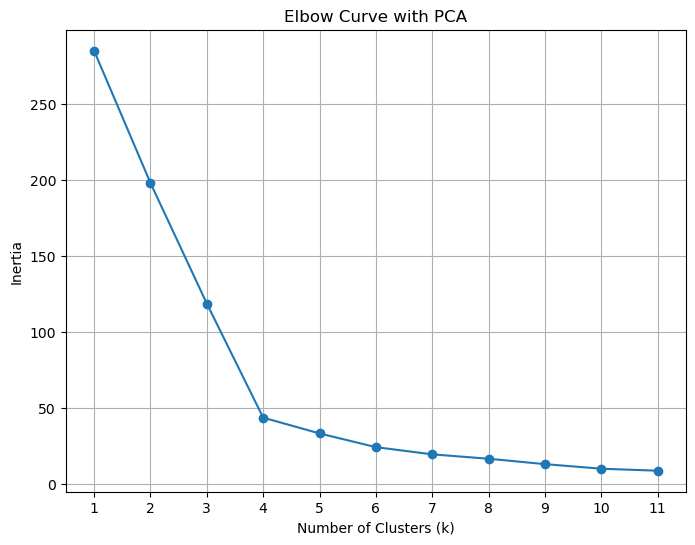

In [105]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_pca, marker='o', linestyle='-')
plt.title('Elbow Curve with PCA')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()






#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value is still 3 when using the PCA data


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it does not differ

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [106]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=3, random_state=1)



In [107]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_crypto_pca)


KMeans(n_clusters=3, random_state=1)

In [108]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
crypto_clusters_pca = kmeans_pca.fit_predict(df_crypto_pca)


# Print the resulting array of cluster values.
print(crypto_clusters_pca)


[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 2 0 0 2 1 0 0 2
 0 0 0 0]


In [109]:
# Create a copy of the scaled PCA DataFrame
df_crypto_pca["class"] = kmeans_pca.labels_


# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_crypto_pca["class"] = kmeans_pca.labels_


# Display the copy of the scaled PCA DataFrame
df_crypto_pca.head(10)


,PC1,PC2,PC3,class
coin_id,,,,
bitcoin,-1.539891,0.001721,0.599430,1
ethereum,-1.264310,-0.020396,1.158286,1
tether,0.311943,-0.556328,-0.793148,0
ripple,0.308756,-0.607236,-0.643243,0
bitcoin-cash,-2.972567,0.118691,1.287400,1
binancecoin,-1.987592,0.339342,0.697284,1
chainlink,-1.642718,0.108206,2.711209,1
cardano,-1.520289,0.228621,1.513142,1
litecoin,-1.265414,-0.219908,0.853886,1


In [110]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

# Create a scatter plot
scatter_plot_pca = df_crypto_pca.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="class",  # Use the class column for color coding
    hover_cols=["coin_id"],  # Display the coin ID on hover
    title="Cryptocurrency Clusters with PCA",
    xlabel="Principal Component 1",
    ylabel="Principal Component 2",
    size=100,
    colormap="viridis"
)

# Display the scatter plot
scatter_plot_pca



:Scatter   [PC1]   (PC2,class,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

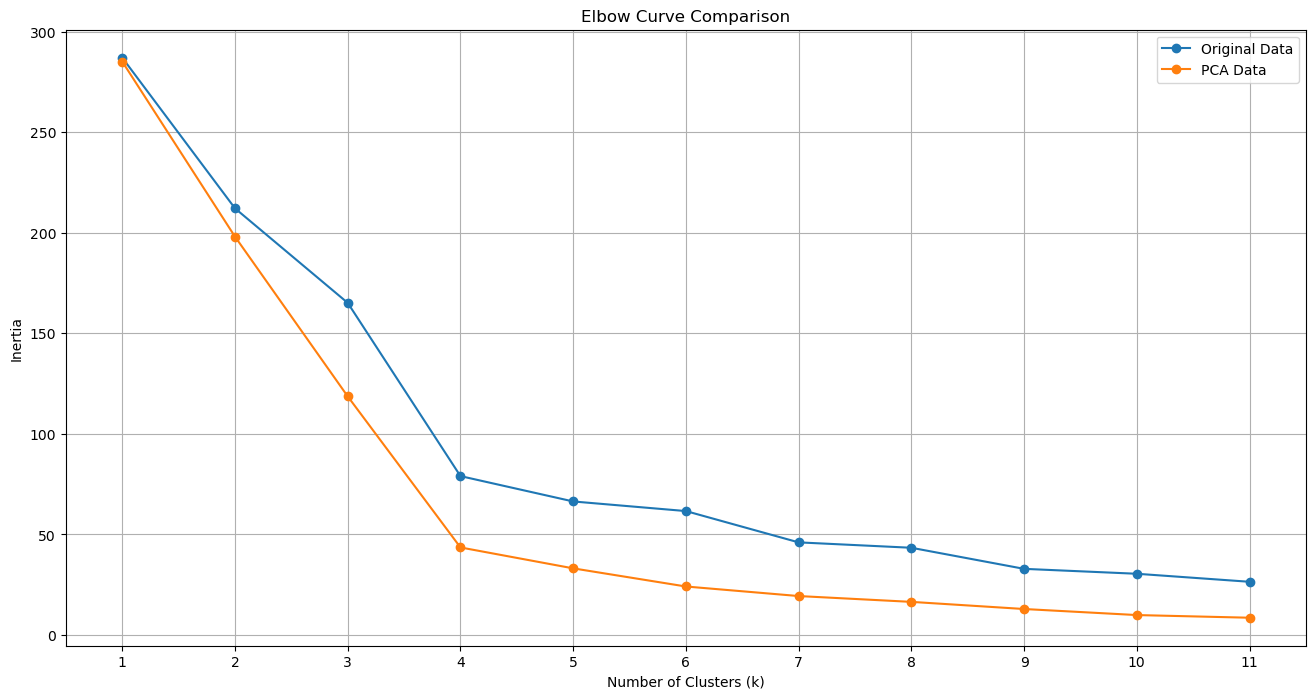

In [111]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(16, 8))
plt.plot(k_values, inertia, marker='o', linestyle='-', label='Original Data')
plt.plot(k_values, inertia_pca, marker='o', linestyle='-', label='PCA Data')
plt.title('Elbow Curve Comparison')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()



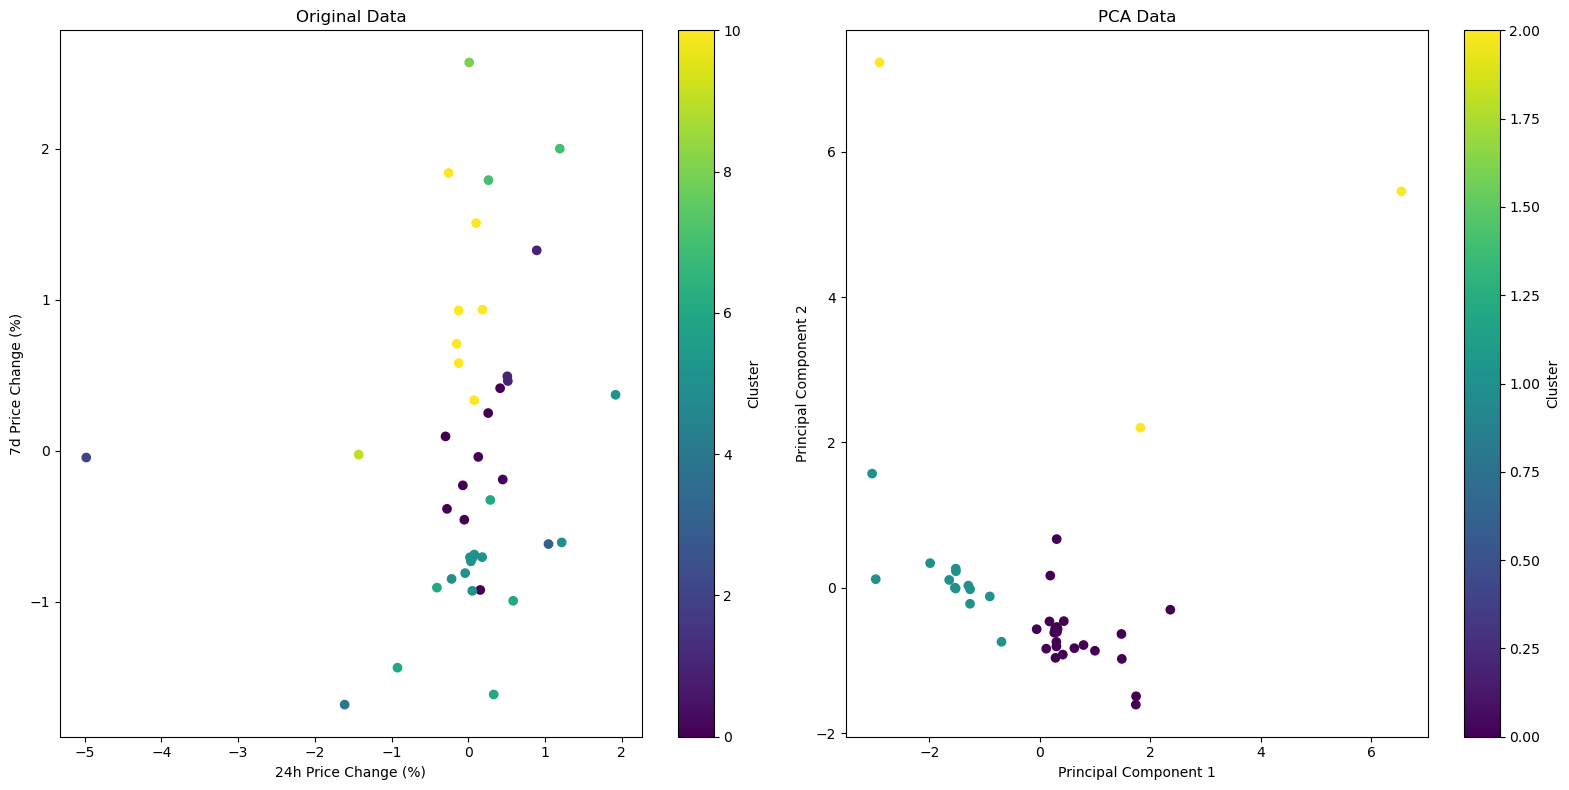

In [112]:
# Composite plot to contrast the clusters
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(df_market_data_scaled["price_change_percentage_24h"], df_market_data_scaled["price_change_percentage_7d"], c=kmeans.labels_)
plt.title('Original Data')
plt.xlabel('24h Price Change (%)')
plt.ylabel('7d Price Change (%)')
plt.colorbar(label='Cluster')
plt.subplot(1, 2, 2)
plt.scatter(df_crypto_pca["PC1"], df_crypto_pca["PC2"], c=kmeans_pca.labels_)
plt.title('PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()



#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features through PCA generally improves clustering efficiency and often enhances interpretability by focusing on key patterns. However, it's crucial to ensure that the retained components capture enough variance to preserve meaningful structure in the data. In this analysis, the clusters formed after PCA should be evaluated against those from the original data to assess consistency and validity.